# Project: Wrangling and Analyze Data

### Overview and contents

This project is the the second installment of the three technical projects curated Udacity's data analyst nanodegree program. I wrangled and analysed data here. The wrangling involved gathering data from different sources, assessing and documenting the quality and tidiness issues in it and finally cleaning the datasets by fixing the issues. The analysis was done afterwards and the results also documented. The project was carried in the five stages listed below.
    
- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Cleaning](#Cleaning)
- [Storing Data](#Storing)
- [Analyzing & Visualizations](#Visualizations)

    

In [1]:
#Importing the libraries needed for the first four stages of the project
import pandas as pd
import numpy as np
import requests
import tweepy
import json

In [2]:
#Setting the display of the columns, the data in cells and decimal places for floats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Display floats with 2 decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#Read the downloaded CSV file into the notebook using Pandas
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Checking the first two rows of the dataset
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Downloading image prediction file programmatically using URL

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
#Reading the TSV file into the notebook
prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
#Checking the first to rows of the dataset to confirm the loading
prediction_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
consumer_key = 'REDACTED'
consumer_secret = 'REDACTED'
access_token = 'REDACTED'
access_secret = 'REDACTED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [8]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
no_tweets = []
for tweet_id in archive_df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        no_tweets.append(tweet_id)


Rate limit reached. Sleeping for: 353
Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 738


In [24]:
print("The number of tweets matched with their IDs:", len(list_of_tweets))
print("The number of tweets with no IDs:", len(no_tweets))

The number of tweets matched with their IDs: 2327
The number of tweets with no IDs: 29


In [25]:
# Adding into a list, the Json part of each tweepy status that was downloaded
returned_list = []
for every_tweet in list_of_tweets:
    returned_list.append(every_tweet)

In [29]:
#Reading the file and saving it into a txt f
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(returned_list, indent=4))

In [8]:
#Reading the saved json file to select the revelant data for my analysis
json_list = []

with open('tweet_json.txt', encoding='utf-8') as json_file:  
    tweets = json.load(json_file)
    for x in tweets:
        tweet_id = x['id']
        favorite_count = x['favorite_count']
        retweet_count = x['retweet_count']

        json_list.append({'tweet_id': tweet_id,
                             'favorite_count': favorite_count,
                             'retweet_count': retweet_count
                            })
        #Loading the data in Json-list into a dataframe
        json_df= pd.DataFrame(json_list, columns = ['tweet_id', 'favorite_count','retweet_count',])


In [9]:
#Checking the first few rows of the dataframe to confirm success
json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33710,6975
1,892177421306343426,29231,5276
2,891815181378084864,21982,3465
3,891689557279858688,36804,7196
4,891327558926688256,35193,7721


## Assessing Data
In this section, **quality and tidiness issues** in the datasets were detected and documented through the use of visual and programmatic.

#### Twitter archive dataset

In [10]:
#Loading the dataset
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### Visual Assessment

In [11]:
#Checking the heaa of the dataset
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
#checking the tail
archive_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
#checking 5 random rows in the dataset
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
804,772117678702071809,nan,nan,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,nan,nan,NaN,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,None,None,None,None
1642,684097758874210310,nan,nan,2016-01-04 19:43:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lupe. This is how she sleeps. 10/...,nan,nan,NaN,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,None,None,None,None
1403,699413908797464576,nan,nan,2016-02-16 02:04:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,nan,nan,NaN,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,None,None,None,None
410,823322678127919110,nan,nan,2017-01-23 00:13:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,nan,nan,NaN,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,None,None,None
1140,727685679342333952,nan,nan,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cilantro. She's a Fellation Gadzooks. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/727685679...,12,10,Cilantro,None,None,None,None


In [14]:
#the sample showed a row I am interested in and I want to zone in
archive_df.iloc[342:344]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,"832,087,547,559,997,440.00","30,582,082.00",2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,nan,nan,NaN,NaN,11,15,None,None,None,None,None
343,832040443403784192,nan,nan,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,"769,940,425,801,170,944.00","4,196,983,835.00",2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


In [15]:
#Checking the shape
archive_df.shape

(2356, 17)

##### Programmatic Assessment

In [16]:
#Checking the information about the dataset using .info function 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Describing the dataset
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,"2,356.00",78.00,78.00,181.00,181.00,"2,356.00","2,356.00"
mean,"742,771,590,321,692,416.00","745,507,917,855,750,784.00","20,141,706,360,873,220.00","772,039,961,038,007,040.00","12,416,983,653,017,598.00",13.13,10.46
std,"68,567,047,444,761,000.00","75,824,920,044,192,880.00","125,279,666,255,236,304.00","62,369,278,105,055,600.00","95,992,535,331,517,504.00",45.88,6.75
min,"666,020,888,022,790,144.00","665,814,696,700,723,200.00","11,856,342.00","666,104,133,288,665,088.00","783,214.00",0.00,0.00
25%,"678,398,938,214,475,776.00","675,741,911,993,464,832.00","308,637,448.75","718,631,497,683,582,976.00","4,196,983,835.00",10.00,10.00
50%,"719,627,934,716,235,776.00","703,870,840,226,598,912.00","4,196,983,835.00","780,465,709,297,995,776.00","4,196,983,835.00",11.00,10.00
75%,"799,337,304,954,252,288.00","825,780,371,286,566,912.00","4,196,983,835.00","820,314,633,777,061,888.00","4,196,983,835.00",12.00,10.00
max,"892,420,643,555,336,192.00","886,266,357,075,128,320.00","840,547,864,354,918,400.00","887,473,957,103,951,872.00","787,461,778,435,289,088.00","1,776.00",170.00


In [18]:
#Checking for duplicates in the dataset
sum(archive_df.duplicated())

0

In [19]:
#Checking the unique names in the dataset
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [20]:
#Checking the value counts of each name in the dataset
archive_df.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Penny           10
Lola            10
Tucker          10
Winston          9
Bo               9
the              8
Sadie            8
Buddy            7
Bailey           7
an               7
Daisy            7
Toby             7
Scout            6
Dave             6
Jack             6
Stanley          6
Koda             6
Oscar            6
Leo              6
Jax              6
Rusty            6
Bella            6
Milo             6
Gus              5
Alfie            5
Louis            5
Sunny            5
Bentley          5
Phil             5
Oakley           5
George           5
Chester          5
Sammy            5
Larry            5
Finn             5
very             5
Beau             4
Reggie           4
Carl             4
Archie           4
Cassie           4
just             4
Jerry            4
one              4
Bear             4
Chip             4
Maximus     

In [21]:
#Checking the value count of the source column
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
#Checking the number of records that are retweets
len(archive_df[archive_df.retweeted_status_id.isnull()==False])

181

#### Image Prediction dataset

##### Visual Assessment

In [23]:
#Checking the first 5 rows of the dataset
prediction_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [24]:
#Checking the tail of the dataset
prediction_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False


In [25]:
#Ramdomly checking 10 rows 
prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.82,True,English_setter,0.09,True,bluetick,0.02,True
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,0.43,True,golden_retriever,0.26,True,Great_Pyrenees,0.18,True
1127,727644517743104000,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,2,Great_Pyrenees,0.46,True,kuvasz,0.39,True,Labrador_retriever,0.09,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.70,True,Eskimo_dog,0.26,True,Norwegian_elkhound,0.01,True
868,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,Shetland_sheepdog,0.62,True,collie,0.37,True,Pembroke,0.01,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.91,True,cocker_spaniel,0.09,True,Shih-Tzu,0.00,True
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.95,True,Cardigan,0.03,True,papillon,0.01,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.98,True,Pomeranian,0.01,True,Eskimo_dog,0.00,True
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.83,True,Labrador_retriever,0.09,True,kuvasz,0.02,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.50,False,studio_couch,0.17,False,barber_chair,0.05,False


In [26]:
#Checking the shape of the dataset
prediction_df.shape

(2075, 12)

##### Programmatic Assessment

In [27]:
#Information about the dataset
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#Description of the dataset
prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,"2,075.00","2,075.00","2,075.00","2,075.00","2,075.00"
mean,"738,451,357,852,529,152.00",1.20,0.59,0.13,0.06
std,"67,852,033,330,235,664.00",0.56,0.27,0.10,0.05
min,"666,020,888,022,790,144.00",1.00,0.04,0.00,0.00
25%,"676,483,507,139,540,992.00",1.00,0.36,0.05,0.02
50%,"711,998,809,858,043,904.00",1.00,0.59,0.12,0.05
75%,"793,203,448,525,178,880.00",1.00,0.84,0.20,0.09
max,"892,420,643,555,336,192.00",4.00,1.00,0.49,0.27


In [29]:
#Checking for duplicacy in the dataset
sum(prediction_df.duplicated())

0

In [30]:
#Checking the unique values in the img_num column
prediction_df.img_num.unique()

array([1, 4, 2, 3])

In [31]:
#Checking the number of duplicates in the jpg_url column
sum(prediction_df.jpg_url.duplicated()==True)

66

In [32]:
#Value counts in img_num column
prediction_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### JSON File from API

##### Visual assessment

In [33]:
#The first five rows of the column
json_df.head(5)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33710,6975
1,892177421306343426,29231,5276
2,891815181378084864,21982,3465
3,891689557279858688,36804,7196
4,891327558926688256,35193,7721


In [34]:
#The last first rows
json_df.tail(5)

,tweet_id,favorite_count,retweet_count
2322,666049248165822465,88,36
2323,666044226329800704,246,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39
2326,666020888022790149,2285,420


In [35]:
#Randoming checking 10 rows in the dataset
json_df.sample(10)

,tweet_id,favorite_count,retweet_count
693,784183165795655680,18888,7434
558,800751577355128832,10066,2617
2292,666435652385423360,137,41
1630,683111407806746624,3140,814
426,819238181065359361,2133,379
1575,685943807276412928,1496,533
2044,670995969505435648,967,241
158,860177593139703809,0,26622
1477,691793053716221953,7481,3822
2121,669683899023405056,338,93


In [36]:
#Shape of the dataset
json_df.shape

(2327, 3)

##### Programmatic assessment

In [37]:
# Dataset's information
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [38]:
#Description of the dataset
json_df.describe()

,tweet_id,favorite_count,retweet_count
count,"2,327.00","2,327.00","2,327.00"
mean,"741,792,990,630,350,208.00","7,029.21","2,459.79"
std,"68,207,946,079,354,976.00","10,923.53","4,165.78"
min,"666,020,888,022,790,144.00",0.00,1.00
25%,"678,139,393,715,109,888.00","1,220.50",492.50
50%,"717,841,801,130,979,328.00","3,040.00","1,144.00"
75%,"798,654,709,143,818,240.00","8,568.00","2,845.00"
max,"892,420,643,555,336,192.00","144,304.00","70,365.00"


In [39]:
#Number of duplicates in the dataset
sum(json_df.duplicated())

0

### Observations from the datasets

### Quality issues
1. Datatypes for tweet_id in the three datasets are inconsistent.

2. There are 66 duplicates in the jpg_url column of the image prediction dataset.

3. Dog names represented in the name column of the archive dataset have errors in them with 'None', 'a', 'an', etc.

4. Source values are formatted as an html string.

5. Retweets and replies are present in the archive dataset.

6. The P1, P2, and P3 columns of predictions dataset contain underscores and the cases used for the names are inconsistent.

7. Text column in the archive dataset have links  in it.

8. The information in the 343rd row of tweet archive dataset is not a dog rating.

9. Some of the tweet_ids present in the archive data are missing in the other two datasets.

### Tidiness issues
1. The columns Pupper, Puppo, Floofer and Doggo of the archive dataset refers to one thing - stages of dog development. It can all be grouped into one column.

2. Some columns in the archive and predictions dataset are irrelevant.

3. The three datasets belong together.

## Cleaning Data
In this section, all of the issues documented while assessing will be cleaned. 


In [40]:
# Make copies of original pieces of data
clean_archive = archive_df.copy()
clean_prdt = prediction_df.copy()
clean_json = json_df.copy()

## Quality Issues

### Issue #1: Datatypes for tweet_id in the three datasets are inconsistent.

#### Define: 

Change the datatypes of tweet_id in the three datasets to string


#### Code

In [41]:
clean_archive.tweet_id = clean_archive.tweet_id.astype('str')
clean_prdt.tweet_id = clean_prdt.tweet_id.astype('str')
clean_json.tweet_id = clean_json.tweet_id.astype('str')

#### Test

In [42]:
print(clean_prdt.tweet_id.dtype)
print(clean_archive.tweet_id.dtype)
print(clean_json.tweet_id.dtype)

object
object
object


### Issue #2: There are 66 duplicates in the jpg_url column of the image prediction dataset.

#### Define
Delete the duplicates in the jpg_url column.

#### Code

In [43]:
clean_prdt = clean_prdt.drop_duplicates(subset=['jpg_url'], keep = 'last')

#### Test

In [44]:
sum(clean_prdt.jpg_url.duplicated())

0

### Issue 3:  Dog names represented in the name column of the archive dataset have errors in them with 'None', 'a', 'an', etc.

#### Define:
Replace all other incorrect values in the name column to 'None' and convert to a NaN thereafter.

#### Code

In [45]:
clean_archive[clean_archive.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [46]:
incorrect = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']

In [47]:
for word in incorrect:
    clean_archive.name.replace(word, 'None', inplace = True)

In [48]:
#Replacing the None in the column with NaNs 
clean_archive.name.replace('None', np.nan, inplace = True)

#### Test

In [49]:
clean_archive.name.value_counts()

Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Lola            10
Penny           10
Winston          9
Bo               9
Sadie            8
Daisy            7
Buddy            7
Toby             7
Bailey           7
Bella            6
Rusty            6
Stanley          6
Leo              6
Milo             6
Jax              6
Oscar            6
Jack             6
Dave             6
Scout            6
Koda             6
Chester          5
Alfie            5
Larry            5
George           5
Finn             5
Sammy            5
Louis            5
Bentley          5
Sunny            5
Phil             5
Oakley           5
Gus              5
Maximus          4
Clarence         4
Reggie           4
Archie           4
Bear             4
Cassie           4
Jeffrey          4
Riley            4
Beau             4
Jerry            4
Maddie           4
Walter           4
Bruce            4
Sampson          4
Hank             4
Chip        

### Issue 4: Source values are formatted as an html string.

#### Define:
Remove the text between the tags in the source column.

#### Code

In [50]:
#Creating a function that will extract the strings between tags
def removal(text):
    #finding the first closed  tag > in the row
    first_closed = text.find('>') + 1
    # finding the first open tag after the previous <
    first_open = text[first_closed:].find('<')
    # extract the text in between
    return text[first_closed:][:first_open]

clean_archive.source = clean_archive.source.apply(lambda text: removal(text))

#### Test

In [51]:
clean_archive.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue 5: Retweets and replies are present in the archive dataset. 

#### Define: 
  Remove the retweets and replies in the dataset

#### Code

In [52]:
#Remove the retweets and replies to the tweet by querying the dataset for where
#columns relating to retweets and replies are null
clean_archive = clean_archive.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')

In [53]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(2), object(11

### Issue 6: The P1, P2, and P3 columns of predictions dataset contain underscores and the cases used for the names are inconsistent.

#### Define: 
Replace the '_' and '-' in the P1,P2 and P3 columns with white space and then capitalize the first word of every row

#### Code

In [54]:
#Fixing the -
clean_prdt.p1 = clean_prdt.p1.str.replace('-', ' ')
clean_prdt.p3 = clean_prdt.p2.str.replace('-', ' ')
clean_prdt.p3 = clean_prdt.p3.str.replace('-', ' ')

#Fixing the _
clean_prdt.p1 = clean_prdt.p1.str.replace('_', ' ')
clean_prdt.p2 = clean_prdt.p2.str.replace('_', ' ')
clean_prdt.p3 = clean_prdt.p3.str.replace('_', ' ')

#Fixing the inconsistent case
clean_prdt.p1 = clean_prdt.p1.str.title()
clean_prdt.p2 = clean_prdt.p2.str.title()
clean_prdt.p3 = clean_prdt.p3.str.title()

#### Test

In [55]:
clean_prdt.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1881,847116187444137987,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,White Wolf,0.13,False,American Staffordshire Terrier,0.11,True,American Staffordshire Terrier,0.08,False
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,Web Site,1.00,False,Dishwasher,0.00,False,Dishwasher,0.00,False
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,Pug,0.41,True,Muzzle,0.17,False,Muzzle,0.05,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,Malinois,0.64,True,Irish Terrier,0.15,True,Irish Terrier,0.07,True
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,Otter,0.95,False,Mink,0.02,False,Mink,0.02,False
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador Retriever,0.21,True,Beagle,0.15,True,Beagle,0.12,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,Golden Retriever,0.43,True,Labrador Retriever,0.26,True,Labrador Retriever,0.13,True
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,1,Golden Retriever,0.80,True,Kuvasz,0.10,True,Kuvasz,0.07,True
1131,728046963732717569,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,1,Newfoundland,0.26,True,Groenendael,0.18,True,Groenendael,0.16,True
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,Rhodesian Ridgeback,0.25,True,Redbone,0.15,True,Redbone,0.14,True


### Issue 7: Text column in the archive dataset have links in it.

#### Define
Remove the links from the text column

#### Code

In [56]:
#Checking a random row to see the format of the text column
clean_archive.text[26]

"This is Maya. She's very shy. Rarely leaves her cup. 13/10 would find her an environment to thrive in https://t.co/I6oNy0CgiT"

In [57]:
#Creating a function that will remove the link
def link_rem(word):
    http_position = word.find('http')
    if http_position == - 1: #Retains row if there's no link
        word = word
    else: 
        word = word[:http_position - 1] #Remove the link and the space before it
    return word

clean_archive.text = clean_archive.text.apply(link_rem)        

#### Test

In [58]:
clean_archive.text.sample(5)

138     Meet Boomer. He's just checking pup on you. Ho...
996           SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek 
15      This is Oliver. You're witnessing one of his m...
1150    I'm getting super heckin frustrated with you a...
1659    aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...
Name: text, dtype: object

In [59]:
#Testing another way for confirmation
for word in clean_archive.text[3:9]:
    print(word)

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek


### Issue 8: The information in the 343rd row of tweet archive dataset is not a dog rating.

#### Define:
Remove the entry in the 343rd row of the archive dataset.

#### Code

In [60]:
clean_archive = clean_archive.drop(clean_archive.index[342])

#### Test

In [61]:
clean_archive.iloc[341:344]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
437,820078625395449857,nan,nan,2017-01-14 01:22:35 +0000,Twitter for iPhone,I've never wanted to go to a camp more in my e...,nan,nan,NaN,https://twitter.com/dog_rates/status/820078625...,12,10,NaN,None,None,None,None
440,819924195358416896,nan,nan,2017-01-13 15:08:56 +0000,Twitter for iPhone,Here we have a doggo who has messed up. He was...,nan,nan,NaN,https://twitter.com/dog_rates/status/819924195...,11,10,NaN,doggo,None,None,None
441,819711362133872643,nan,nan,2017-01-13 01:03:12 +0000,Twitter for iPhone,This is Howie. He just bloomed. 11/10 revoluti...,nan,nan,NaN,https://twitter.com/dog_rates/status/819711362...,11,10,Howie,None,None,None,None


### Issue 9: Some of the tweet_ids present in the archive data are missing in the other two datasets.

#### Define
Fix the missing data.

#### Code

The missing data in the data set will be fixed when I merge the dataset together using inner join.

## Tidiness

### Issue 1: The columns Pupper, Puppo, Floofer and Doggo of the archive dataset refers to one thing - stages of dog development. It can all be grouped into one column.

#### Define
Create a dog stage column and add all the puppo, pupper, doggo and floofer columns into it. Replace the none values with NaN afterwards

#### Code

In [62]:
#Creating a function that creates a dog_stage column.
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if not stage:
        return 'None'
    else:
        return ','.join(stage)

In [63]:
clean_archive['dog_stage'] = clean_archive.apply(lambda row: dog_stage(row), axis = 1)

In [64]:
clean_archive.dog_stage.replace('None', np.nan, inplace = True)

#### Test

In [65]:
clean_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
213,851591660324737024,nan,nan,2017-04-11 00:24:08 +0000,Twitter for iPhone,Oh jeez u did me quite the spook little fella....,nan,nan,NaN,https://twitter.com/dog_rates/status/851591660...,11,10,NaN,None,None,None,None,NaN
591,799063482566066176,nan,nan,2016-11-17 01:35:54 +0000,Twitter for iPhone,This is Mister. He only wears the most fashion...,nan,nan,NaN,https://twitter.com/dog_rates/status/799063482...,11,10,Mister,None,None,None,None,NaN
761,778286810187399168,nan,nan,2016-09-20 17:36:50 +0000,Twitter for iPhone,This is Stanley. He has too much skin. Isn't h...,nan,nan,NaN,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,None,None,None,None,NaN
405,823939628516474880,nan,nan,2017-01-24 17:04:50 +0000,Twitter for iPhone,This is Cash. He's officially given pup on tod...,nan,nan,NaN,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,None,None,None,None,NaN
2297,667073648344346624,nan,nan,2015-11-18 20:15:26 +0000,Twitter for iPhone,Here is Dave. He is actually just a skinny leg...,nan,nan,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None,NaN


### Issue 2: Some columns in the archive and predictions dataset are irrelevant.

#### Define
Remove irrelevant columns in the predictions and archive dataset

#### Code

In [66]:
#Checking the columns in the archive dataset
clean_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage'], dtype='object')

In [67]:
#Dropping the columns that are not relevant
clean_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo',], axis = 1, inplace = True)

In [68]:
#Checking the columns in the prediction dataset
clean_prdt.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object')

In [69]:
clean_prdt.drop('img_num', axis = 1, inplace = True)

#### Test

In [70]:
clean_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN


In [71]:
clean_prdt.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.47,True,Collie,0.16,True,Collie,0.06,True


### Issue 3: The three datasets belong together.

#### Define
Merge the dataset together using tweet_id as the primary key and with an inner join to perform an intersection that will account for the missing tweet_ids in the json and prediction dataset

#### Code

In [72]:
merged_df = pd.merge(clean_archive, clean_prdt, on = 'tweet_id', how = 'inner')
merged_df = pd.merge(merged_df, clean_json, on = 'tweet_id', how = 'inner')

In [73]:
#Comfirming the merge
merged_df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.10,False,Bagel,0.09,False,Bagel,0.08,False,33710,6975


In [74]:
#Checking the shape of the merged data set
merged_df.shape

(1897, 20)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
merged_df.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, the wrangled data is analysed to produce insight and visualization.

In [76]:
#Importing libraries needed for the analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [77]:
#Loading the cleaned and merged dataset
df = pd.read_csv('twitter_archive_master.csv')

In [78]:
#Checking the first three rows of df
df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.10,False,Bagel,0.09,False,Bagel,0.08,False,33710,6975
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.32,True,Pekinese,0.09,True,Pekinese,0.07,True,29231,5276
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.72,True,Malamute,0.08,True,Malamute,0.03,True,21982,3465


#### Insights

1. Relationship between the retweet counts and favorite counts

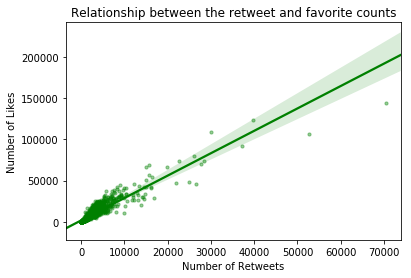

In [79]:
ax = sns.regplot(x='retweet_count', y='favorite_count', data=df, color='g', scatter_kws={'s':10, 'alpha':.4}) 
ax.set(xlabel='Number of Retweets', ylabel='Number of Likes', title='Relationship between the retweet and favorite counts');

2. Dog stages and retweets

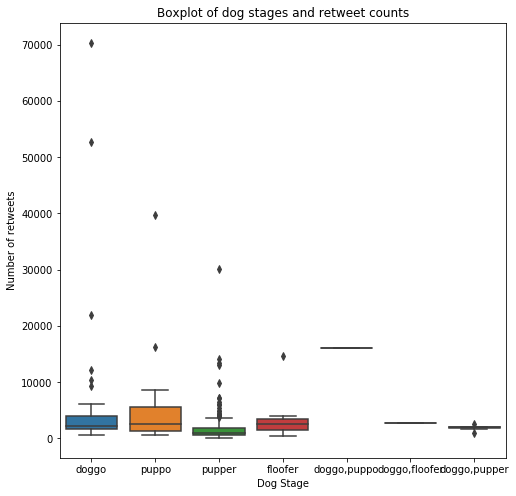

In [80]:
plt.figure(figsize =(8,8))
g = sns.boxplot(x = 'dog_stage', y = 'retweet_count', data = df)
g.axes.set_title('Boxplot of dog stages and retweet counts')
g.axes.set_xlabel('Dog Stage')
g.axes.set_ylabel('Number of retweets');

3. Tweet source

In [81]:
data = df.groupby('source').count()['tweet_id']
data

source
TweetDeck               10
Twitter Web Client      26
Twitter for iPhone    1861
Name: tweet_id, dtype: int64

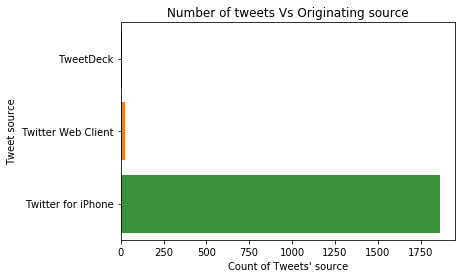

In [82]:
ax = sns.barplot(y=data.index, x=data.values, orient='h')
ax.set(xlabel="Count of Tweets' source",
       ylabel='Tweet source',
       title='Number of tweets Vs Originating source');

### Insights summary:
1. The retweet counts and favorite counts are linearly correlated. The have a positive relationship which makes an increase in one result in the other.

2. Doggo is the dog type with the most retweets. Puppo dogs are the ones with the most number among other dog types

3. Iphone is the originating source of the highest number of tweets.

### Visualization

Creating a word cloud image from the text column

In [ ]:
#Collecting all the texts in the text column
Text = " ".join(word for words in df.text)

#Creating a wordcloud list
stopwords = set(STOPWORDS)

#Setting the specifications
wordcloud = WordCloud(width = 2000, height = 1500,
                background_color ='white',
                stopwords = stopwords).generate(Text)
 
# plot the WordCloud image                      
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off');